<a href="https://colab.research.google.com/github/guidomoor/FEA-ML/blob/main/Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [104]:
 #Create a model that inherits nn.Module
 class Model(nn.Module):
  #Input Layer (4 features of flower) -->
  #Hidden Layer 1 (#of neurons) -->
  #H2 --> Output
  #(3 classes of flowers)
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  #this function is pushing the information forward through the layers
  def forward(self, x):
    x = F.relu(self.fc1(x)) #rectify linear unit function relu
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x

In [105]:
#ML involves randomization so we need to define a seed
torch.manual_seed(32) #pick a manual seed for randomization
model = Model()

In [106]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [107]:
my_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [108]:
my_df['species'] = my_df['species'].replace({'setosa':0, 'versicolor':1, 'virginica':2})
my_df

<ipython-input-108-a681f51c77cf>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species'] = my_df['species'].replace({'setosa':0, 'versicolor':1, 'virginica':2})


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [109]:
#drop last column (separate from df)
X = my_df.drop('species', axis=1)
y = my_df['species']
#convert to numpy arrays
#Data used in the NN
X = X.values
y = y.values

In [110]:
from sklearn.model_selection import train_test_split


In [111]:
#Train Test Slip
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

In [112]:
#transform data in torch tensors
#X features to float tensors
#y features to long tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [113]:
#Set the criterion of model to measure the error
criterion = nn.CrossEntropyLoss()
#Choose an Optimizer - Adam Optimizer, learning rate (lr).
#learning rate is used in case the error does not go down
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [114]:
#Train the model:
#Epochs: (one run through all the training data in the network)
epochs = 100
losses = []
for i in range(epochs):
  #go forward and get a prediction
  y_pred = model.forward(X_train)

  #Measure the loss/error
  loss = criterion(y_pred, y_train) #predicted values vs the y_train

  #Keep Track of losses
  losses.append(loss.detach().numpy())

  #Print the losses
  if i % 10 == 0:
    print(f'Epoch: {i} Loss: {loss}')

  #Do back propagation: take error of forward propagation and feed it backwords to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 Loss: 1.169895887374878
Epoch: 10 Loss: 0.9578844308853149
Epoch: 20 Loss: 0.7988812923431396
Epoch: 30 Loss: 0.634953498840332
Epoch: 40 Loss: 0.44043001532554626
Epoch: 50 Loss: 0.29171693325042725
Epoch: 60 Loss: 0.17829042673110962
Epoch: 70 Loss: 0.11587585508823395
Epoch: 80 Loss: 0.08928148448467255
Epoch: 90 Loss: 0.07743765413761139


Text(0.5, 0, 'Epoch')

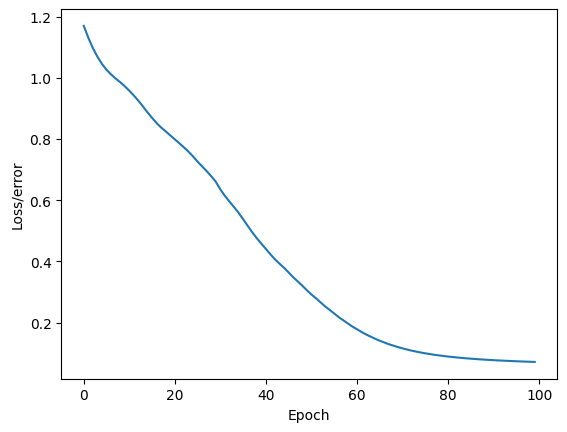

In [115]:
#Plot Loss
plt.plot(range(epochs), losses)
plt.ylabel('Loss/error')
plt.xlabel('Epoch')

In [116]:
#Evaluate Model on Test Data Set
with torch.no_grad(): #turns off backpropagation
  y_eval = model.forward(X_test)
  loss = criterion(y_eval, y_test)

loss

tensor(0.0539)

In [117]:
#let's see how any of these are correct
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model(data)

    print(f'{i+1}. {str(y_val)} {y_test[i]} {y_val.argmax().item()}' )

    #correct or not
    if y_val.argmax().item() == y_test[i]:
      correct += 1

print(f'{correct} out of {len(y_test)} = {100*correct/len(y_test)}% correct')


1. tensor([-3.3580,  3.9452,  0.3616]) 1 1
2. tensor([  7.5862,   1.1113, -11.3861]) 0 0
3. tensor([  6.6288,   1.5092, -10.4603]) 0 0
4. tensor([-3.3305,  4.2647,  0.0569]) 1 1
5. tensor([-7.3705,  2.8135,  5.1481]) 2 2
6. tensor([-7.3749,  3.9061,  4.2781]) 2 2
7. tensor([  6.2304,   1.6527, -10.0543]) 0 0
8. tensor([  6.8783,   1.4056, -10.7016]) 0 0
9. tensor([-2.6728,  4.3138, -0.6444]) 1 1
10. tensor([  7.2201,   1.3890, -11.1494]) 0 0
11. tensor([-3.8269,  4.4110,  0.5165]) 1 1
12. tensor([-8.6886,  1.9990,  6.9012]) 2 2
13. tensor([-2.0605,  3.8275, -0.7672]) 1 1
14. tensor([-1.0676,  4.3809, -2.2975]) 1 1
15. tensor([-7.5000,  2.6230,  5.3318]) 2 2
16. tensor([-8.6214,  1.5491,  7.1280]) 2 2
17. tensor([-3.7724,  3.6503,  0.9422]) 1 1
18. tensor([-6.7624,  2.7791,  4.5289]) 2 2
19. tensor([-1.6978,  4.2047, -1.4772]) 1 1
20. tensor([  7.8104,   1.3824, -11.9435]) 0 0
21. tensor([  6.9175,   1.5954, -10.9322]) 0 0
22. tensor([-9.4323,  2.7058,  7.2346]) 2 2
23. tensor([-5.7703,

In [120]:
#new random input
new_Iris = torch.tensor([[5.6, 3.7, 2.2, 0.5]])
#Feed into the NN, like the X_test
with torch.no_grad():
  print(model(new_Iris))
#Is giving me the 3 outputs, the highest is the correct answer

tensor([[  6.4461,   1.9940, -10.6154]])


In [121]:
#Save NN Model
torch.save(model.state_dict(), 'my_iris_model.pt')

In [122]:
#load the saved model
new_model = Model()
new_model.load_state_dict(torch.load('my_iris_model.pt'))

<ipython-input-122-3b7f1afac5ea>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(torch.load('my_iris_model.pt'))


<All keys matched successfully>

In [123]:
#Make sure it's loaded correctly
new_model.eval()


Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)